In [22]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
# Importing the training set
train = pd.read_csv('Google_Stock_Price_Train.csv').iloc[:, 0:2]
train['Date']=pd.to_datetime(train['Date'])
#train.set_index('Date',inplace=True)

In [19]:
train.isnull().sum()

Open    0
dtype: int64

In [18]:
train.shape

(1258, 1)

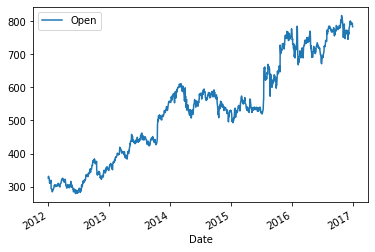

In [11]:
train.plot()

In [31]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Open'],order=(1,1,1))
model_fit=model.fit()

In [34]:
forecast=model_fit.predict(start=1,end=1258)
train['forecast'] = forecast
train.head()

,Date,Open,forecast
0,2012-01-03,325.25,NaN
1,2012-01-04,331.27,0.363771
2,2012-01-05,329.83,0.158774
3,2012-01-06,328.34,0.495836
4,2012-01-09,322.04,0.386595


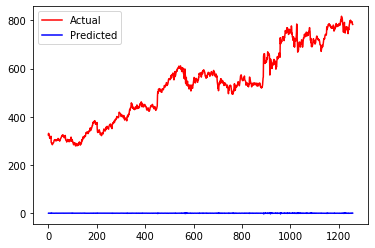

In [35]:
# Visualising the results
plt.plot(train['Open'], color = 'red', label = 'Actual')
plt.plot(train['forecast'], color = 'blue', label = 'Predicted')
plt.legend()
plt.show()

In [23]:
model=sm.tsa.statespace.SARIMAX(train['Open'],order=(1, 1, 1),seasonal_order=(1,1,1,60))
results=model.fit()

/home/rasel/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [27]:
forecast=results.predict(start=1,end=1258, dynamic=True)
train['forecast'] = forecast
train.head()

,Date,Open,forecast
0,2012-01-03,325.25,NaN
1,2012-01-04,331.27,325.249081
2,2012-01-05,329.83,325.249428
3,2012-01-06,328.34,325.249297
4,2012-01-09,322.04,325.249346


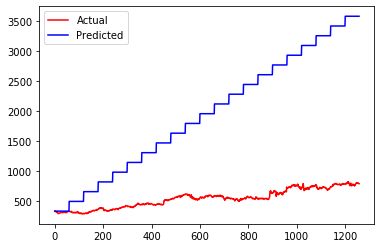

In [30]:
# Visualising the results
plt.plot(train['Open'], color = 'red', label = 'Actual')
plt.plot(train['forecast'], color = 'blue', label = 'Predicted')
plt.legend()
plt.show()